In [1]:
import gymnasium as gym
import numpy as np
import random
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
desc=["SFFF", "FHHH", "FFFF", "HFHF", "FFGF"]

env = gym.make('FrozenLake-v1', desc=desc, map_name="5x5", is_slippery=False) 
observation, info = env.reset()

In [3]:
def calculate_percentage_change(old_q_table, new_q_table):
    """
    Calculate the percentage change in Q-values between two Q-tables.

    Parameters:
        old_q_table (numpy.ndarray): The old Q-table.
        new_q_table (numpy.ndarray): The new Q-table.

    Returns:
        float: The percentage change in Q-values.
    """
    q_diff = np.abs(new_q_table - old_q_table)
    avg_change = np.mean(q_diff)
    old_avg = np.mean(old_q_table)
    return (avg_change / old_avg) * 100

In [4]:
blacklistedActions = np.empty((env.observation_space.n), dtype=object)

for rowIndex, row in enumerate(desc):
    for columnIndex, typ in enumerate(row):
        blacklist = []
        if rowIndex == 0:
            blacklist.append(3)
        elif rowIndex == len(desc)-1:
            blacklist.append(1)
        if columnIndex == 0:
            blacklist.append(0)
        elif columnIndex == len(row)-1:
            blacklist.append(2)
        blacklistedActions[(4*rowIndex)+(columnIndex)] = blacklist

def is_valid_action(state, action):
    stateBlacklist = blacklistedActions[state]
    
    if action in stateBlacklist:
        return False
    else:
        return True

In [5]:
# Define parameters
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
epsilon = 0.01  # Epsilon-greedy parameter
num_episodes = 1000

# Initialize Q-values
num_states = env.observation_space.n
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))

stateI = 0
for state in Q:
    for action in blacklistedActions[stateI]:
        Q[stateI][action] = -1
    stateI+=1

print(Q)
    
statistics = pd.DataFrame({
    "Time": [],
    "Episode": [],
    "Q-Difference": [],
    "GotGift": []
})

# Monte Carlo
start_time = time.time()

greedyNum = 0
totalNum = 0
for episode in range(num_episodes):
    state = env.reset()[0]
    done = False
    
    gotGift = False
    
    episode_states = []
    episode_actions = []
    episode_rewards = []
    
    
    arr_copy = Q.copy()
    
    while not done:
        # Epsilon-greedy action selection
        
        totalNum+=1
        if np.random.rand() < epsilon:
            greedyNum+=1
            actionLoop = True
            while actionLoop:
                action = env.action_space.sample()  # Random action
                if is_valid_action(state, action):
                    actionLoop = False
        else:
            actionLoop = True
            action = np.argmax(Q[state])  # Greedy action
            while actionLoop:
                if is_valid_action(state, action):
                    actionLoop = False
                else:
                    action = env.action_space.sample()  # Random action
        
        episode_states.append(state)
        episode_actions.append(action)
        
        # Take action and observe next state and reward
        step = env.step(action)
        next_state = step[0]
        reward = step[1]
        done = step[2]
        
        if reward == 0 and done:
            reward = -1
        elif next_state == state:
            reward = -1
        elif reward == 1:
            gotGift = True
            print("Got gift "+str(done))
        
        episode_rewards.append(reward)
        
        
            
        # Move to next state
        state = next_state
    
    # Update Q-values
    G = 0
    for t in reversed(range(len(episode_states))):
        state = episode_states[t]
        action = episode_actions[t]
        reward = episode_rewards[t]
        G = gamma * G + reward
        Q[state][action] += alpha * (G - Q[state][action])
    
    change = calculate_percentage_change(arr_copy, Q)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    statistics.loc[episode] = {
        "Time": elapsed_time,
        "Episode": episode+1,
        "Q-Difference": -change,
        "GotGift": gotGift
    }
    
    if gotGift:
        print("Hit gift! At Episode:", episode + 1)

# Optimal policy
optimal_policy = np.argmax(Q, axis=1)

print("Optimal policy:")
print(optimal_policy)


[[-1.  0.  0. -1.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  0. -1.]
 [ 0.  0. -1. -1.]
 [-1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0. -1.  0.]
 [-1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0. -1.  0.]
 [-1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0. -1.  0.]
 [-1. -1.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0. -1. -1.  0.]]
Got gift True
Hit gift! At Episode: 44
Got gift True
Hit gift! At Episode: 56
Got gift True
Hit gift! At Episode: 59
Got gift True
Hit gift! At Episode: 64
Got gift True
Hit gift! At Episode: 65
Got gift True
Hit gift! At Episode: 66
Got gift True
Hit gift! At Episode: 67
Got gift True
Hit gift! At Episode: 68
Got gift True
Hit gift! At Episode: 69
Got gift True
Hit gift! At Episode: 70
Got gift True
Hit gift! At Episode: 71
Got gift True
Hit gift! At Episode: 72
Got gift True
Hit gift! At Episode: 73
Got gift True
Hit gift! At Episode: 74
Got gift True
Hit gift! At Episode: 75
Got gift True
Hit gift! At Episode

Hit gift! At Episode: 301
Got gift True
Hit gift! At Episode: 302
Got gift True
Hit gift! At Episode: 303
Got gift True
Hit gift! At Episode: 304
Got gift True
Hit gift! At Episode: 305
Got gift True
Hit gift! At Episode: 306
Got gift True
Hit gift! At Episode: 307
Got gift True
Hit gift! At Episode: 308
Got gift True
Hit gift! At Episode: 309
Got gift True
Hit gift! At Episode: 310
Got gift True
Hit gift! At Episode: 311
Got gift True
Hit gift! At Episode: 312
Got gift True
Hit gift! At Episode: 313
Got gift True
Hit gift! At Episode: 314
Got gift True
Hit gift! At Episode: 315
Got gift True
Hit gift! At Episode: 316
Got gift True
Hit gift! At Episode: 317
Got gift True
Hit gift! At Episode: 318
Got gift True
Hit gift! At Episode: 319
Got gift True
Hit gift! At Episode: 320
Got gift True
Hit gift! At Episode: 321
Got gift True
Hit gift! At Episode: 322
Got gift True
Hit gift! At Episode: 323
Got gift True
Hit gift! At Episode: 324
Got gift True
Hit gift! At Episode: 325
Got gift True


Hit gift! At Episode: 583
Got gift True
Hit gift! At Episode: 584
Got gift True
Hit gift! At Episode: 585
Got gift True
Hit gift! At Episode: 586
Got gift True
Hit gift! At Episode: 587
Got gift True
Hit gift! At Episode: 588
Got gift True
Hit gift! At Episode: 589
Got gift True
Hit gift! At Episode: 590
Got gift True
Hit gift! At Episode: 591
Got gift True
Hit gift! At Episode: 592
Got gift True
Hit gift! At Episode: 593
Got gift True
Hit gift! At Episode: 594
Got gift True
Hit gift! At Episode: 595
Got gift True
Hit gift! At Episode: 596
Got gift True
Hit gift! At Episode: 597
Got gift True
Hit gift! At Episode: 598
Got gift True
Hit gift! At Episode: 599
Got gift True
Hit gift! At Episode: 600
Got gift True
Hit gift! At Episode: 601
Got gift True
Hit gift! At Episode: 602
Got gift True
Hit gift! At Episode: 603
Got gift True
Hit gift! At Episode: 604
Got gift True
Hit gift! At Episode: 605
Got gift True
Hit gift! At Episode: 606
Got gift True
Hit gift! At Episode: 607
Got gift True


Hit gift! At Episode: 923
Got gift True
Hit gift! At Episode: 924
Got gift True
Hit gift! At Episode: 925
Got gift True
Hit gift! At Episode: 926
Got gift True
Hit gift! At Episode: 927
Got gift True
Hit gift! At Episode: 928
Got gift True
Hit gift! At Episode: 929
Got gift True
Hit gift! At Episode: 930
Got gift True
Hit gift! At Episode: 931
Got gift True
Hit gift! At Episode: 932
Got gift True
Hit gift! At Episode: 933
Got gift True
Hit gift! At Episode: 934
Got gift True
Hit gift! At Episode: 935
Got gift True
Hit gift! At Episode: 936
Got gift True
Hit gift! At Episode: 937
Got gift True
Hit gift! At Episode: 938
Got gift True
Hit gift! At Episode: 939
Got gift True
Hit gift! At Episode: 940
Got gift True
Hit gift! At Episode: 941
Got gift True
Hit gift! At Episode: 942
Got gift True
Hit gift! At Episode: 943
Got gift True
Hit gift! At Episode: 944
Got gift True
Hit gift! At Episode: 945
Got gift True
Hit gift! At Episode: 946
Got gift True
Hit gift! At Episode: 947
Got gift True


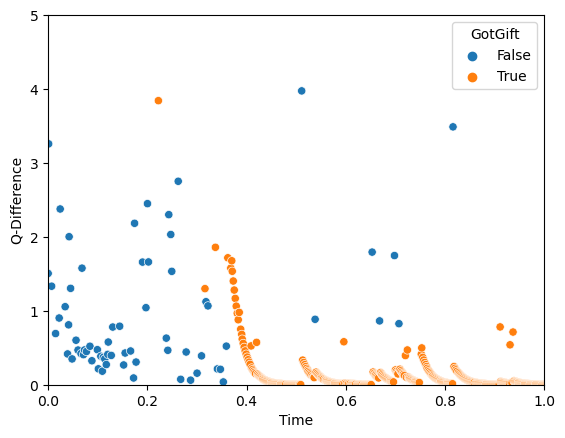

In [6]:
# Create the scatter plot
sns.scatterplot(data=statistics, x="Time", y="Q-Difference", hue="GotGift")

# Set the limits of x and y axes
plt.ylim(0, 5)
plt.xlim(0, 1)
# Show the plot
plt.show()

In [7]:
print(greedyNum / totalNum * 100)

1.1014671542494603


In [8]:
for state in Q:
    print(state)

[-1.          0.5861329  -0.24018108 -1.        ]
[-0.12313653 -0.40951    -0.2186899  -1.        ]
[-0.24298869 -0.1        -0.08302756 -1.        ]
[-0.00225284 -0.1        -1.         -1.        ]
[-1.          0.65608713 -0.95760884  0.21763167]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[ 0.  0. -1.  0.]
[-1.         -0.93538918  0.72898572  0.18218748]
[ 0.12468051  0.80998697 -0.16290329 -0.61257951]
[-1.34787422e-08 -1.90000000e-01 -5.68998151e-03 -1.00000000e-01]
[-0.0063222  0.        -1.         0.       ]
[-1.  0.  0.  0.]
[-0.3439     0.9        0.         0.2507031]
[0. 0. 0. 0.]
[ 0.  0. -1.  0.]
[-1.    -1.     0.171 -0.1  ]
[ 0.081    -1.        1.        0.278559]
[ 0. -1.  0.  0.]
[ 0. -1. -1.  0.]
